<img src="image/9940.png" alt="logo">

---

In [116]:
from functools import reduce
import time
from time import sleep
import matplotlib
import pandas as pd
import missingno as msno

from adige import ArquivoCSV
from adige import valore_abbreviato

In [117]:
#data = './base.csv'
data = 'https://raw.githubusercontent.com/enzoschitini/Enzo/main/Progetti/db/international_matches.csv'

In [118]:
df = pd.read_csv(data)

In [119]:
line, colonne = df.shape
print(line, colonne)

23921 25


In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

<Axes: >

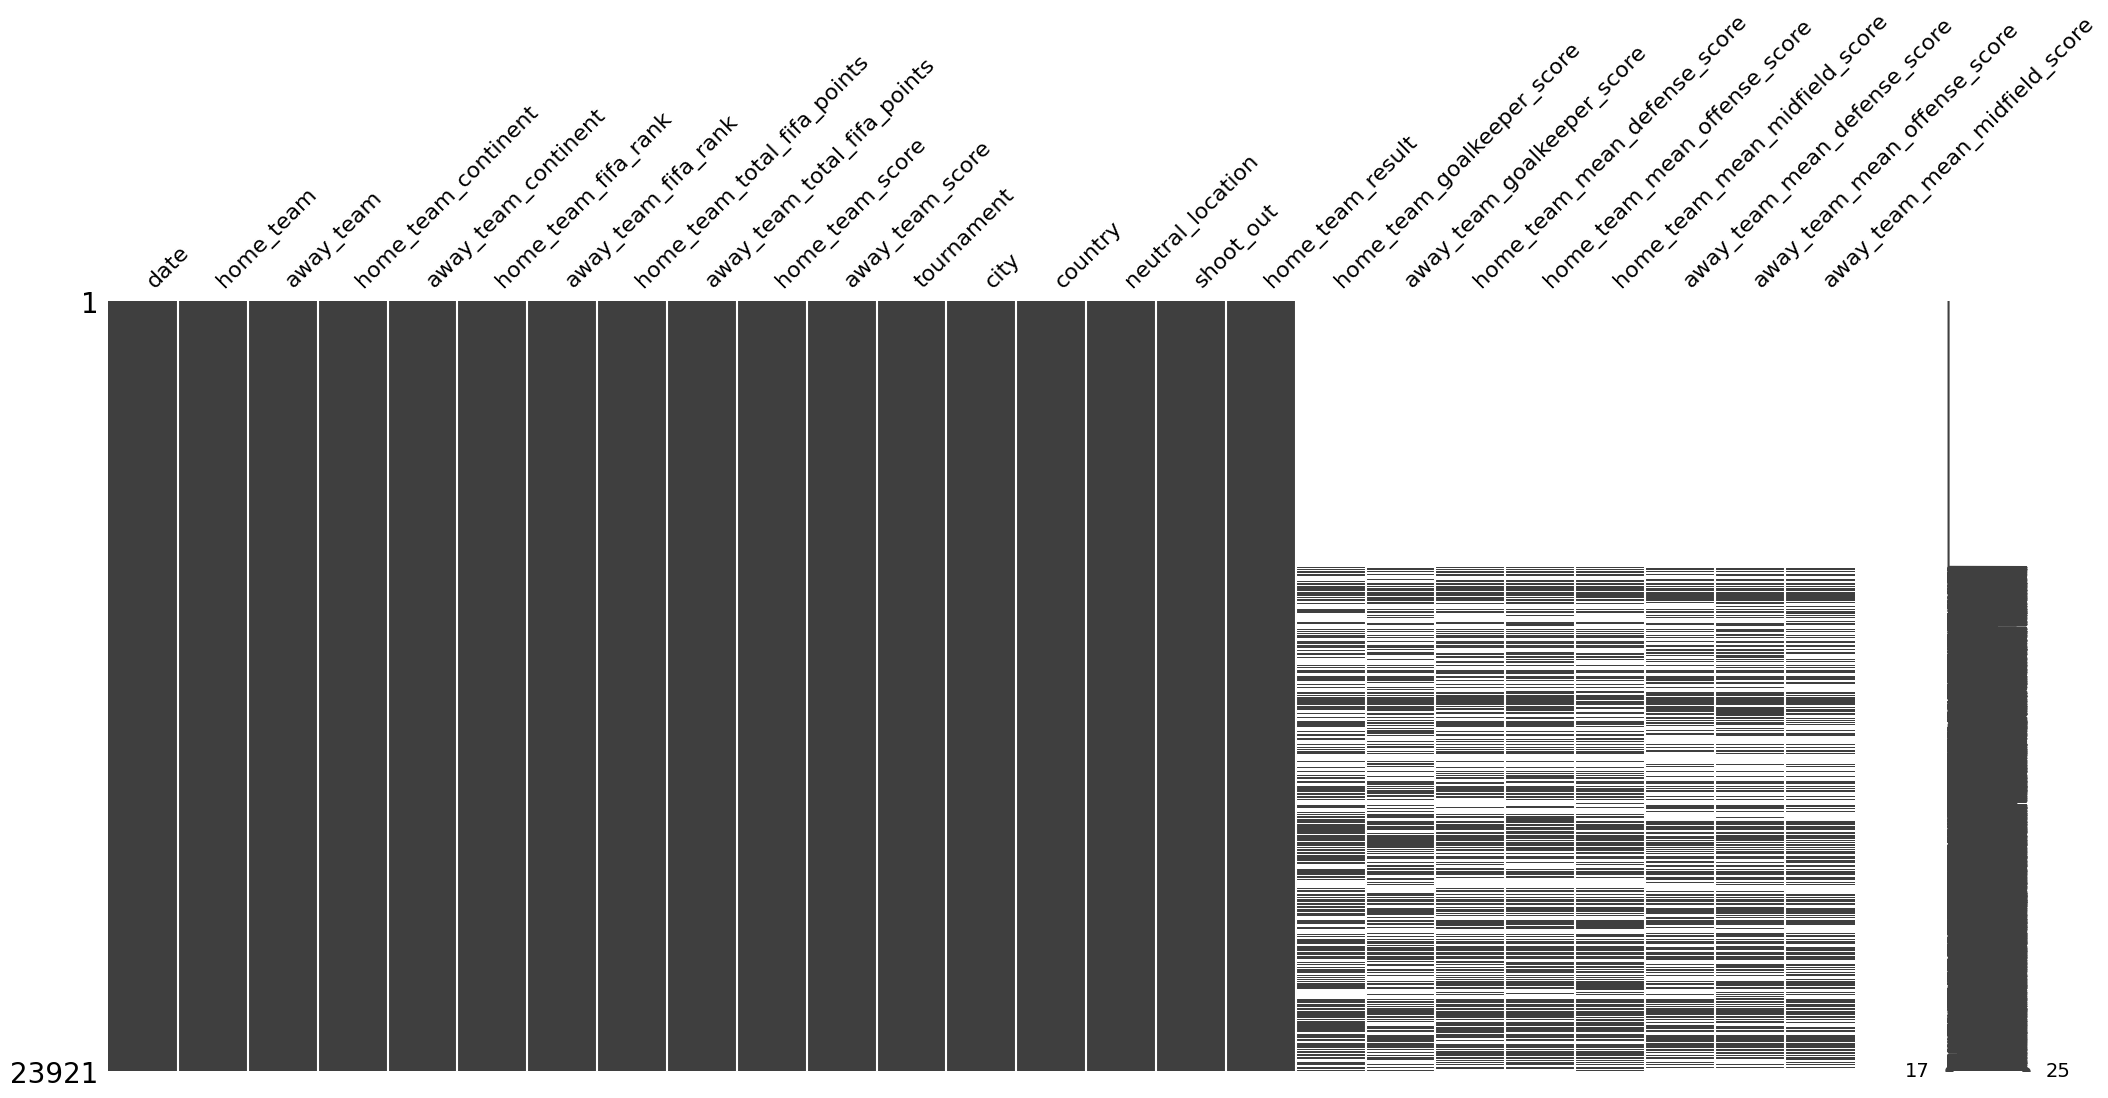

In [121]:
msno.matrix(df)

In [122]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

<Axes: >

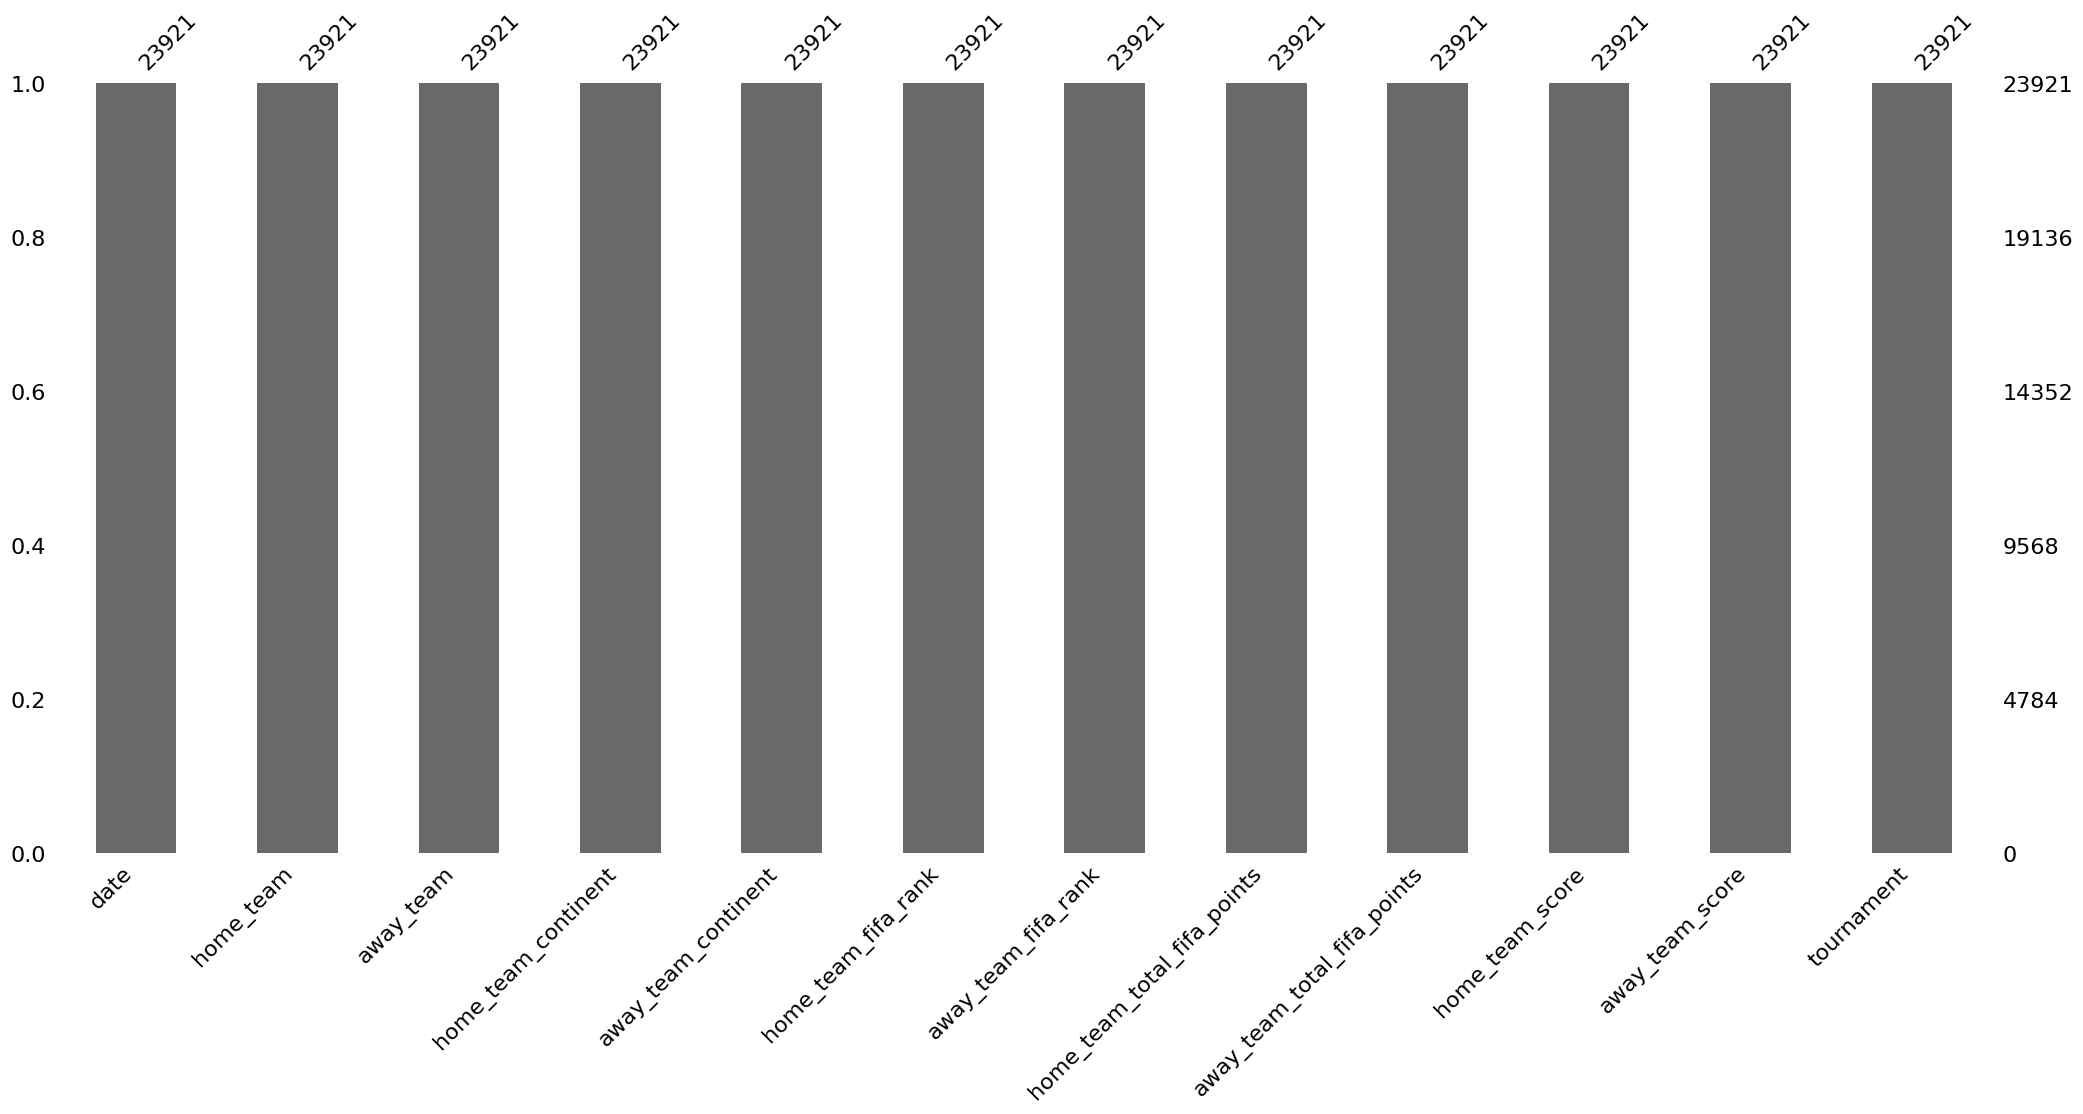

In [123]:
df = df.drop(columns=["home_team_goalkeeper_score", "away_team_goalkeeper_score", "home_team_mean_defense_score", "home_team_mean_offense_score", "home_team_mean_midfield_score", "away_team_mean_defense_score", "away_team_mean_offense_score", "away_team_mean_midfield_score", "city", "country", "neutral_location", "shoot_out", "home_team_result"])
df = df.dropna()

msno.bar(df)

In [124]:
df.dtypes

date                           object
home_team                      object
away_team                      object
home_team_continent            object
away_team_continent            object
home_team_fifa_rank             int64
away_team_fifa_rank             int64
home_team_total_fifa_points     int64
away_team_total_fifa_points     int64
home_team_score                 int64
away_team_score                 int64
tournament                     object
dtype: object

In [125]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000


In [126]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,1,Friendly


In [127]:
inicio = pd.to_datetime(df['date']).dt.date.min()
print(inicio)
fim = pd.to_datetime(df['date']).dt.date.max()
print(fim)

1993-08-08
2022-06-14


In [128]:
df.isnull().sum()

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
home_team_score                0
away_team_score                0
tournament                     0
dtype: int64

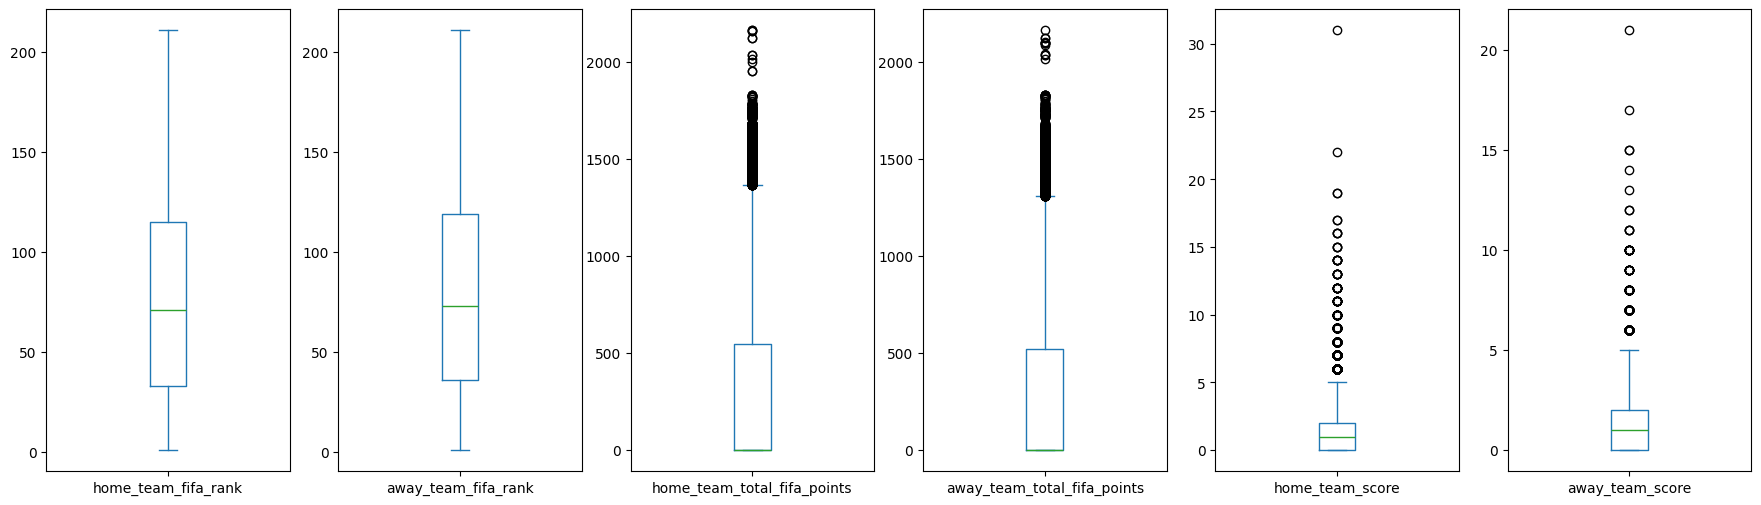

In [129]:
df.plot(kind='box',figsize=(22,6),subplots=True); 

In [130]:
df.home_team.value_counts()

home_team
Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: count, Length: 211, dtype: int64

In [131]:
df["tournament"].value_counts(normalize=True).to_dict() # La percentuale

{'Friendly': 0.35776096317043604,
 'FIFA World Cup qualification': 0.23109401780862004,
 'UEFA Euro qualification': 0.07202876133940889,
 'African Cup of Nations qualification': 0.053258643033318,
 'AFC Asian Cup qualification': 0.022616111366581666,
 'African Cup of Nations': 0.02048409347435308,
 'FIFA World Cup': 0.01805944567534802,
 'UEFA Nations League': 0.017348773044605158,
 'COSAFA Cup': 0.012917520170561431,
 'CECAFA Cup': 0.012875715898164792,
 'Copa América': 0.012290456084611847,
 'Gold Cup': 0.01216504326742193,
 'AFF Championship': 0.011956021905438735,
 'CFU Caribbean Cup qualification': 0.010701893733539568,
 'UEFA Euro': 0.010576480916349652,
 'AFC Asian Cup': 0.009656786923623595,
 'African Nations Championship': 0.00940596128924376,
 'Gulf Cup': 0.008528071568914343,
 'UNCAF Cup': 0.0060616194975126455,
 'SAFF Cup': 0.006019815225116007,
 'Confederations Cup': 0.005685381045942895,
 'CONCACAF Nations League': 0.005267338321976506,
 'CFU Caribbean Cup': 0.00451486141

In [132]:
torneo_df = df[(df['tournament'] == 'FIFAWorldCup') | (df['tournament'] == 'Friendly') | (df['tournament'] == 'UEFAEuroqualification') | (df['tournament'] == 'FIFAWorldCupqualification') | (df['tournament'] == 'CopaAmérica') | (df['tournament'] == 'UEFAEuro')]

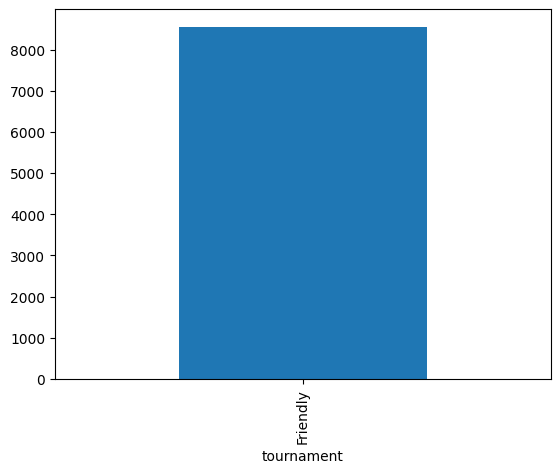

In [133]:
torneo_df.tournament.value_counts().plot(kind='bar');

In [134]:
torneo_df.values.tolist()

[['1993-08-08',
  'Brazil',
  'Mexico',
  'South America',
  'North America',
  8,
  14,
  0,
  0,
  1,
  1,
  'Friendly'],
 ['1993-08-08',
  'Guinea',
  'Sierra Leone',
  'Africa',
  'Africa',
  65,
  86,
  0,
  0,
  1,
  0,
  'Friendly'],
 ['1993-08-08',
  'Zimbabwe',
  'Eswatini',
  'Africa',
  'Africa',
  50,
  102,
  0,
  0,
  2,
  0,
  'Friendly'],
 ['1993-08-09',
  'Guinea',
  'Sierra Leone',
  'Africa',
  'Africa',
  65,
  86,
  0,
  0,
  4,
  0,
  'Friendly'],
 ['1993-08-11',
  'Faroe Islands',
  'Norway',
  'Europe',
  'Europe',
  111,
  9,
  0,
  0,
  0,
  7,
  'Friendly'],
 ['1993-08-11',
  'Sweden',
  'Switzerland',
  'Europe',
  'Europe',
  4,
  3,
  0,
  0,
  1,
  2,
  'Friendly'],
 ['1993-08-31',
  'Iceland',
  'USA',
  'Europe',
  'North America',
  53,
  28,
  0,
  0,
  0,
  1,
  'Friendly'],
 ['1993-09-06',
  'Eswatini',
  'Zimbabwe',
  'Africa',
  'Africa',
  102,
  50,
  0,
  0,
  0,
  1,
  'Friendly'],
 ['1993-09-08',
  'Norway',
  'USA',
  'Europe',
  'North Amer

In [135]:
df["tournament"].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [136]:
df.groupby('tournament').agg({"home_team_score":"median", "away_team_score":"median"})

,home_team_score,away_team_score
tournament,,
ABCS Tournament,1.0,0.0
AFC Asian Cup,1.0,1.0
AFC Asian Cup qualification,2.0,1.0
AFC Challenge Cup,1.0,1.0
AFC Challenge Cup qualification,1.0,1.0
...,...,...
USA Cup,2.0,1.0
United Arab Emirates Friendship Tournament,1.0,1.0
VFF Cup,1.0,1.0


In [137]:
goal = df["home_team_score"].sum()
print(goal)

38494


In [138]:
# faturamento por loja
faturamento_por_loja = df[["home_team", "home_team_score"]].groupby("home_team").sum()
display(faturamento_por_loja)

,home_team_score
home_team,
Afghanistan,51
Albania,156
Algeria,297
American Samoa,17
Andorra,36
...,...
Vietnam,225
Wales,160
Yemen,100
